In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

2022-08-13 09:47:03.747422: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [23]:
directory = '/home/charlene/Val_imagenet_dataset_12Aug/'
df = pd.read_csv(directory+'val.csv',delimiter=' ')
df

file_name  label
0      ILSVRC2012_val_00000001.JPEG     65
1      ILSVRC2012_val_00000002.JPEG    970
2      ILSVRC2012_val_00000003.JPEG    230
3      ILSVRC2012_val_00000004.JPEG    809
4      ILSVRC2012_val_00000005.JPEG    516
...                             ...    ...
49995  ILSVRC2012_val_00049996.JPEG    283
49996  ILSVRC2012_val_00049997.JPEG     26
49997  ILSVRC2012_val_00049998.JPEG    232
49998  ILSVRC2012_val_00049999.JPEG    982
49999  ILSVRC2012_val_00050000.JPEG    355

[50000 rows x 2 columns]

In [3]:
file_paths = df['file_name'].values  # 50000 files
file_paths

array(['ILSVRC2012_val_00000001.JPEG', 'ILSVRC2012_val_00000002.JPEG',
       'ILSVRC2012_val_00000003.JPEG', ...,
       'ILSVRC2012_val_00049998.JPEG', 'ILSVRC2012_val_00049999.JPEG',
       'ILSVRC2012_val_00050000.JPEG'], dtype=object)

In [4]:
labels= df['label'].values
labels

array([ 65, 970, 230, ..., 232, 982, 355])

In [5]:
ds_train=tf.data.Dataset.from_tensor_slices((file_paths,labels))

2022-08-13 09:47:11.454079: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/charlene/miniconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-08-13 09:47:11.454275: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-08-13 09:47:11.455455: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other o

In [6]:
def read_image(image_file, label):
    image= tf.io.read_file(directory+image_file)
    image=tf.image.decode_image(image, channels=3,dtype=tf.float32,expand_animations=False)
#     print('Image type: ',type(image))
#     print('Label type: ' , type(label))
#     print('inside read_image func: ',image)
    return image,label

In [7]:
def augment(image,label):
    #print('augment func image type: ',type(image))
#     print('augment func label type',type(label))
#     print(type(image))
#     print(image)
#     print(label)
    #plt.imshow(image)
    image=tf.image.resize(
    image,
    (224,224),
    preserve_aspect_ratio=False,
    antialias=False,
    name=None)
    
    return image,label


In [108]:
# Do not delete
val_data=ds_train.map(read_image).map(augment).batch(16)

# extracting accuracy of Validation dataset

In [ ]:
#11.42am start the line below

In [144]:
count=0
for x_val,y_val in val_data:
    example_1_image=x_val
    label_1_image=y_val
    prediction_16_batch=model(example_1_image*255)
    top_1_prediction=tf.math.argmax(prediction_16_batch,axis=1)
    count+=(top_1_prediction==label_1_image).numpy().sum()

    
    

2022-08-13 10:50:06.926088: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at whole_file_read_ops.cc:114 : NOT_FOUND: /home/charlene/Val_imagenet_dataset_12Aug/ILSVRC2012_val_00012500.JPEG; No such file or directory


NotFoundError: /home/charlene/Val_imagenet_dataset_12Aug/ILSVRC2012_val_00012500.JPEG; No such file or directory
	 [[{{node ReadFile}}]] [Op:IteratorGetNext]

In [145]:
count

5447

In [141]:
(top_1_prediction==label_1_image).numpy().sum()

8

In [120]:
prediction_16_batch.shape

TensorShape([16, 1000])

In [133]:
tensor_test=(label_1_image==tf.math.argmax(prediction_16_batch,axis=1))
type(tensor_test)

tensorflow.python.framework.ops.EagerTensor

In [136]:
tensor_test.numpy()

array([ True, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True, False,  True])

In [121]:
tf.math.argmax(prediction_16_batch,axis=1)


<tf.Tensor: shape=(16,), dtype=int64, numpy=
array([ 65, 795, 160, 968, 431,  65, 296, 720, 674, 332, 109, 286, 370,
       757, 840, 147])>

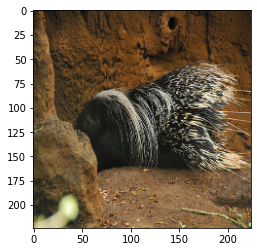

In [50]:
plt.imshow(example_1_image[6])

In [51]:
model=tf.keras.applications.vgg16.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [19]:
image_alps=example_1_image[1]
image_alps.shape
image_alps_input=tf.expand_dims(
    image_alps, axis=0, name=None
)

# how to get top 5 predictions

In [37]:
predict_alps=model(image_alps_input*255)
predict_alps.shape
prediction_by_index_descending_order=tf.argsort(
    predict_alps, axis=-1, direction='DESCENDING', stable=False, name=None
)
type(prediction_by_index_descending_order)
tf.slice(prediction_by_index_descending_order[0], begin=[0], size=[5])
# tf.math.argmax(
#     predict_alps,
#     axis=1,
#     output_type=tf.dtypes.int64,
#     name=None
# )

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([795, 970, 792, 802, 672], dtype=int32)>

# End of how to get top 5 predictions

In [53]:
predict_on_2_images=model(example_1_image*255)
predict_on_2_images.shape

TensorShape([8, 1000])

In [54]:
tf.math.argmax(
    predict_on_2_images,
    axis=1,
    output_type=tf.dtypes.int64,
    name=None
)

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 65, 795, 160, 968, 431,  65, 296, 720])>

In [55]:
label_1_image

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 65, 970, 230, 809, 516,  57, 334, 415])>

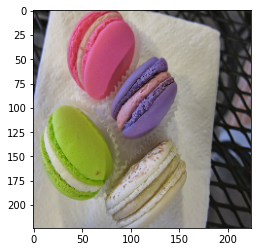

In [64]:
plt.imshow(example_1_image[7])

# Castle Image

In [93]:
img = cv2.imread('/home/charlene/tensorflow_1/examples/images/castle.jpg')
input_img=np.expand_dims(img,0)
input_img.shape

(1, 224, 224, 3)

In [103]:
# mean=[0.485, 0.456, 0.406]
# std=[0.229, 0.224, 0.225]

In [104]:
# try_input_img=((img/255.0)-mean)/std
# try_input_img_1=np.expand_dims(try_input_img,0)
# try_input_img_1.shape

In [105]:
predict2=model(input_img)
tf.math.argmax(
    predict2,
    axis=1,
    output_type=tf.dtypes.int64,
    name=None
)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([483])>